In [2]:
## tools (Arxiv and Wikipedia)

from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import ArxivAPIWrapper, WikipediaAPIWrapper

In [5]:
# Import the ArxivAPIWrapper and ArxivQueryRun classes to interact with the Arxiv API.
# ArxivAPIWrapper is used to configure the API wrapper with specific parameters like the number of results and maximum content length.
# ArxivQueryRun is a tool that uses the API wrapper to query Arxiv for research papers.

# Create an instance of ArxivAPIWrapper with specific configurations:
# - top_k_results=3: Limits the number of results returned to 3.
# - doc_content_chars_max=1000: Restricts the maximum number of characters in the document content.


api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=3, doc_content_chars_max=1000)
arxiv = ArxivQueryRun(api_wrapper=api_wrapper_arxiv, description="Query Arxiv for research papers")
print(arxiv.name)

arxiv


In [6]:
print(arxiv.invoke("Attention is all you need"))

Published: 2024-07-22
Title: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models
Authors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini
Summary: The inference demand for LLMs has skyrocketed in recent months, and serving
models with low latencies remains challenging due to the quadratic input length
complexity of the attention layers. In this work, we investigate the effect of
dropping MLP and attention layers at inference time on the performance of
Llama-v2 models. We find that dropping dreeper attention layers only marginally
decreases performance but leads to the best speedups alongside dropping entire
layers. For example, removing 33\% of attention layers in a 13B Llama2 model
results in a 1.8\% drop in average performance over the OpenLLM benchmark. We
also observe that skipping layers except the latter layers reduces performances
for more layers skipped, except for skipping the attention layers.

Published: 2021-0

In [9]:
# Initialize the Wikipedia API Wrapper with specific configurations:
# - top_k_results=3: Limits the number of results returned to 3.
# - doc_content_chars_max=1000: Restricts the maximum number of characters in the document content.
api_wrapper_wikipedia = WikipediaAPIWrapper(top_k_results=3, doc_content_chars_max=1000)
wikipedia = WikipediaQueryRun(api_wrapper=api_wrapper_wikipedia, description="Query Wikipedia for information")
print(wikipedia.name)

wikipedia


In [11]:
from dotenv import load_dotenv
load_dotenv()

import os
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [12]:
# Tavily search tool
# Tavily is a search engine that provides access to internet
# search results, including various sources like news articles, blogs, and other web content.
from langchain_community.tools.tavily_search import TavilySearchResults 
tavily = TavilySearchResults()

print(tavily.invoke("what is the latest research about mushrooms?"))

[{'title': 'Mushrooms - latest research news and features - Phys.org', 'url': 'https://phys.org/tags/mushrooms/', 'content': 'Invasive tree logs show promise for mushroom production\n\nAn article in the latest issue of Invasive Plant Science and Management provides new insights on the varying potential for using invasive tree logs to grow edible, marketable mushrooms.\n\nEcology\n\nOct 22, 2024\n\n0\n\n80\n\nFungi finding: mushroom hunters seek new species and recognition [...] Scientists have amassed genome data for dozens of "magic mushroom" isolates and cultivars, with the goal to learn more about how their domestication and cultivation has changed them. The findings, published December 4 in ...\n\nMolecular & Computational biology\n\nDec 4, 2023\n\n0\n\n357\n\nNovel plant pathogen discovered on world\'s northernmost island [...] Mycelial fibers, the fibrous cells found in fruiting mushroom bodies, have gained momentum as a sustainable material for making leather and packaging owing

In [13]:
# combine the tools
tools = [arxiv, wikipedia, tavily]

In [16]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="qwen-qwq-32b")

In [17]:
llm.invoke("what is mushroom?")


AIMessage(content='\n<think>\nOkay, the user is asking "What is mushroom?" I need to provide a clear and comprehensive answer. Let me start by defining what a mushroom is. I should mention that mushrooms are fungi, not plants. Maybe start with a basic definition.\n\nFirst, I should explain that mushrooms are the fruiting bodies of fungi. That\'s important because people might confuse the whole organism with just the visible part. Then, I should differentiate between the mycelium and the fruiting body. The mycelium is the network under the ground, right?\n\nNext, I should talk about the structure of a mushroom. The cap, gills, stem, and spores. Maybe describe each part briefly. The cap\'s role in protecting spores, gills for producing spores, stem supporting the cap. Spores are crucial for reproduction, so that\'s a key point.\n\nThen, maybe discuss the types of mushrooms. There are many species, like Agaricus bisporus (common store mushroom), shiitake, morels, etc. Also, mention some a

In [23]:
#Binding tools with LLM

llm_with_tools = llm.bind_tools(tools=tools)
llm_with_tools.invoke("what is the latest news about mushrooms?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_s20e', 'function': {'arguments': '{"query": "latest news about mushrooms"}', 'name': 'tavaly_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 338, 'prompt_tokens': 326, 'total_tokens': 664, 'completion_time': 0.84250163, 'prompt_time': 0.034776272, 'queue_time': 0.549121231, 'total_time': 0.877277902}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_a91d9c2cfb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-c2e465a6-19ab-40a5-9379-9abd182d1656-0', tool_calls=[{'name': 'tavaly_search_results_json', 'args': {'query': 'latest news about mushrooms'}, 'id': 'call_s20e', 'type': 'tool_call'}], usage_metadata={'input_tokens': 326, 'output_tokens': 338, 'total_tokens': 664})

In [24]:
## Workflow

from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

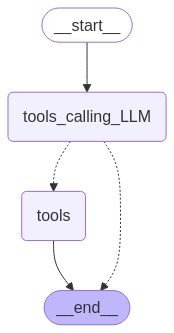

In [25]:
# Define the state structure using a TypedDict.
# The state includes a single key "messages" which is a list of AnyMessage objects.
# The Annotated type is used to add metadata to the "messages" field, specifying that
# the add_messages function should be used to handle the addition of messages to the state.
## State
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

# Define a node function that interacts with the LLM and tools.
# This function takes the current state as input and invokes the LLM with tools,
# passing the "messages" from the state as input. The result is returned as a dictionary
# with the key "messages", which will update the state.
## Nodes
def tools_calling_LLM(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Build a state graph to define the workflow of the system.
# The graph consists of nodes and edges that represent the flow of data and logic.
# Nodes are added to the graph, each representing a specific function or operation.
# Edges define the connections between nodes, specifying the order of execution.
## Build Graph
builder = StateGraph(State)
builder.add_node("tools_calling_LLM", tools_calling_LLM)
builder.add_node("tools", ToolNode(tools))

# Define the edges of the graph to establish the workflow.
# The START node connects to the "tools_calling_LLM" node, indicating that the workflow begins here.
builder.add_edge(START, "tools_calling_LLM")

# Add conditional edges from the "tools_calling_LLM" node based on the tools_condition function.
# This allows for dynamic branching in the workflow based on specific conditions.
builder.add_conditional_edges("tools_calling_LLM", tools_condition)

# Connect the "tools" node to the END node, indicating that the workflow ends here.
builder.add_edge("tools", END)

# Compile the graph to finalize its structure and make it ready for execution.
graph = builder.compile()

# Display the graph as a visual representation using Mermaid.js.
# The graph is rendered as a PNG image for visualization purposes.
display(Image(graph.get_graph().draw_mermaid_png()))

In [26]:
# The following code demonstrates how providing an Arxiv research paper identifier (e.g., "1706.03762")
# invokes the Arxiv search tool through the LLM. The graph is configured to use the tools, including
# the ArxivQueryRun tool, to process the input message and fetch relevant research paper details.
messages = graph.invoke({"messages":"1706.03762"})
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_fhzy)
 Call ID: call_fhzy
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, based
solely on attention mechanisms, dispensing with recurrence and convolutions
entirely. Experiments on two machine translation tasks show these models

In [27]:
# Here no tools were invoked and the LLM responded directly.
messages = graph.invoke({"messages":"Hi how are you?"})
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

Hi how are you?
================================== Ai Message ==================================

Hello! I'm just a large language model, so I don't have feelings, but I'm here to help you! How can I assist you today?


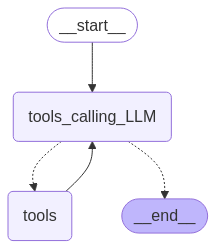

In [28]:
# This graph defines a workflow for interacting with tools and the LLM.
# It uses a state graph to manage the flow of data and logic between nodes.

# The "tools_calling_LLM" node is responsible for invoking the LLM with tools.
# It takes the current state (messages) as input and updates the state with the LLM's response.

# The "tools" node represents a collection of tools that can be used in the workflow.
# These tools include Arxiv, Wikipedia, and Tavily search functionalities.

# Edges define the flow between nodes:
# - The workflow starts at the START node and proceeds to "tools_calling_LLM".
# - Conditional edges from "tools_calling_LLM" allow dynamic branching based on the tools_condition function.
# - The "tools" node connects back to "tools_calling_LLM", enabling iterative interactions.
# - The workflow ends at the END node after processing is complete.


## Build Graph

builder = StateGraph(State)
builder.add_node("tools_calling_LLM", tools_calling_LLM)
builder.add_node("tools",ToolNode(tools))

#Edges

builder.add_edge(START, "tools_calling_LLM")
builder.add_conditional_edges("tools_calling_LLM",
                              tools_condition)
builder.add_edge("tools", "tools_calling_LLM")
graph = builder.compile()

#Display Graph
display(Image(graph.get_graph().draw_mermaid_png()))

In [29]:
messages = graph.invoke({"messages":"Hi my name is Navya can you tell me research paper about attention mechanism?"})
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

Hi my name is Navya can you tell me research paper about attention mechanism?
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_sj9s)
 Call ID: call_sj9s
  Args:
    query: attention mechanism
================================= Tool Message =================================
Name: arxiv

Published: 2022-03-27
Title: A General Survey on Attention Mechanisms in Deep Learning
Authors: Gianni Brauwers, Flavius Frasincar
Summary: Attention is an important mechanism that can be employed for a variety of
deep learning models across many different domains and tasks. This survey
provides an overview of the most important attention mechanisms proposed in the
literature. The various attention mechanisms are explained by means of a
framework consisting of a general attention model, uniform notation, and a
comprehensive taxonomy of attention mechanisms. Furthermor

In [30]:
# two tools are invoked here sequentially
messages = graph.invoke({"messages":"Tell me about latest news regarding attention and what are the recent research in attention mechanisms?"})
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

Tell me about latest news regarding attention and what are the recent research in attention mechanisms?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_jzc4)
 Call ID: call_jzc4
  Args:
    query: latest news about attention mechanisms in AI
  arxiv (call_ez9p)
 Call ID: call_ez9p
  Args:
    query: attention mechanisms recent research
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Unraveling Attention Mechanisms: How Transformers Became AI's ...", "url": "https://dhirajkumarblog.medium.com/unraveling-attention-mechanisms-how-transformers-became-ais-core-24cdefc42f75", "content": "In 2017, the paper “Attention Is All You Need” introduced a groundbreaking architecture known as Transformers. This model revolutionized natural language processing (NLP)